In [1]:
# 1. Downloaded the Shark Attack dataset and successfully imported it into your Python environment.
# Hay que instalar esta librería xlrd --> pip3 install xlrd
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import re


url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
df_sharks = pd.read_excel(url)

In [2]:
# Performed an initial analysis of the dataset to understand its structure and what the fields represent.

print(df_sharks.shape)
df_sharks.head(3)



(6970, 23)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2024-09-16 00:00:00,2024.0,Unprovoked,Morocco,Southern Morocco,West of Dakhla,Swimming - jumped off yacht,German Tourist,F,30,...,Reportedly a Great White,Andy Currie: Moroccan World News: Sky News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-08-26 00:00:00,2024.0,Unprovoked,Jamaica,Montego Bay,Falmouth,Spearfishing,Jahmari Reid,M,16,...,Reportedly Tiger Shark,Todd Smith: Daily Mail UK: Sky News: People .com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-08-06 00:00:00,2024.0,Unprovoked,Belize,Gulf of Honduras,Central America,Swimming - Diving,Annabelle Carlson,F,15,...,Reef shark 6ft (1.8m),Kevin McMurray Tracking Sharks.com New York Po...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## LIMPIANDO LOS NOMBRES DE LAS COLUMNAS


df_sharks.columns = df_sharks.columns.str.strip()
df_sharks.columns = df_sharks.columns.str.lower() # To make all column names in lower case
df_sharks.columns = df_sharks.columns.str.replace(" ", "_") #To replace spaces in column names with "_"




In [4]:
## ELIMINANDO COLUMNAS QUE NO NOS INTERESAN


df_sharks = df_sharks.drop(columns=['pdf', 'href_formula', 'href', 'case_number', 'case_number.1',
       'original_order', 'unnamed:_21', 'unnamed:_22', 'unnamed:_11', 'source', 'name'])

In [5]:
## Filtrar 25 últimos años de fecha

df_sharks['date'] = pd.to_datetime(df_sharks['date'], errors='coerce')
current_year = datetime.now().year
year_cutoff = current_year - 25

df_sharks = df_sharks[df_sharks['date'].dt.year >= year_cutoff]

In [6]:
## ESCIBIENDO DATOS DE COUNTRY EN FORMATO TITLE

df_sharks["country"]= [str(x).title() for x in df_sharks['country']]

In [7]:
## PAISES DONDE MAYOR Y MENOR NUMERO DE ATAQUES REGISTRADOS HAY


shark_attacks_country = df_sharks['country'].value_counts()
country_most_attacks = shark_attacks_country.idxmax()
most_attacks = shark_attacks_country.max()
country_least_attacks = shark_attacks_country.idxmin()
least_attacks = shark_attacks_country.min()
print(f"país {country_least_attacks} y ataques: {least_attacks}")
print(f"país {country_most_attacks} y ataques: {most_attacks}")

país Croatia y ataques: 1
país Usa y ataques: 1332


In [8]:
## LIMPIAR COLUMNA SEX

df_sharks['sex'] = df_sharks['sex'].map({'N':       'M',
                                        ' M':       'M',
                                        'M ':       'M',
                                        'M x 2':    'M',
                                        'lli':      '?',
                                        '.':        '?',
                                        'M':        'M',
                                        'F':        'F'})

In [9]:
## COLUMNA ACTIVITY

len(df_sharks['activity'].unique())

df_sharks['activity'].isna().sum()

df_sharks['activity'] = df_sharks['activity'].str.lower()
df_sharks['activity'] = df_sharks['activity'].fillna("not specified")
df_sharks['activity'] = df_sharks['activity'].str.replace(r'[\\/&]', '', regex=True)
df_sharks['activity'] = df_sharks['activity'].str.replace(r'[\[\]()\.\"\'\',?]', '', regex=True) 
df_sharks['activity'] = df_sharks['activity'].str.replace(r'\d+', '', regex=True) 
df_sharks['activity'] = df_sharks['activity'].str.replace(r'[-<>]', '', regex=True) 
df_sharks['activity'] = df_sharks['activity'].str.replace(r'\b\w\s\b|\b\s\w\b', '', regex=True)  
df_sharks['activity'] = df_sharks['activity'].str.replace(r'(\b\s\w{2}\b|\b\w{2}\s\b|\b\s\w{2}\s\b)', '', regex=True) 
df_sharks['activity'] = df_sharks['activity'].str.strip()  
df_sharks['activity'] = df_sharks['activity'].str.replace(r'\s+', ' ', regex=True)  
df_sharks['activity'] = df_sharks['activity'].str.replace(r'\b\w\s\b|\b\s\w\b', '', regex=True)  
df_sharks['activity'] = df_sharks['activity'].str.replace(r'(\b\s\w{2}\b|\b\w{2}\s\b|\b\s\w{2}\s\b)', '', regex=True) 


In [10]:
def clasificar_activity(activ : str):
    if type(activ) is not str:
        return activ

    clasificaciones = {
        'swimming': ['swimming'],
        'fishing' : ['fishing'],
        'surfing' : ['surfing', 'surfng', 'foil boarding', 'sitting surfboard'],
        'wading' : ['wading'],
        'walking' : ['walking'],
        'snorkeling' : ['snorkeling', 'snorkelling'],
        'lobstering' : ['lobstering', 'lobster'],
        'freediving' : ['freediving', 'free diving'],
        'diving' : ['diving'],
        'playing' : ['playing'],
        'rowing' : ['rowing'],
        'jumped into water' : ['jumped into water', 'jumpinf'],
        'paddleboarding' : ['paddle boarding', 'paddle'], 
        'floating' : ['floating'],
        'photographing' : ['photographing', 'photo shoot', 'grabbing shark for selfie', 'filming'],
        'kiteboarding' : ['kiteboarding', 'kite boarding'],
        'canoeing' : ['canoeing'],
        'standing' : ['standing'],
        'surfskiing' : ['surfskiing', 'surf skiing'],
        'kayaking' : ['kayaking', 'kakaying'],
        'not specified' : ['not specified'],
        'body boarding' : ['body boarding'],
        'boogie boarding' : ['boogie boarding'],
        
    }

    
    for clasificacion, keywords in clasificaciones.items():
        if any(keyword in activ for keyword in keywords):
            return clasificacion

    return activ

In [11]:
clasificar_activity(df_sharks['activity'])

0       swimming jumped off yacht
1                    spearfishing
2                 swimming diving
3                         surfing
4                         surfing
                  ...            
2779                 spearfishing
2780                paddle skiing
2781              inflatable boat
2783                 spearfishing
2784                 spearfishing
Name: activity, Length: 2644, dtype: object

In [12]:
df_sharks['activity'] = df_sharks['activity'].apply(clasificar_activity)


In [13]:
# Lista de las categorías definidas por mi
defined_activities = {'swimming',
        'fishing',
        'surfing',
        'wading',
        'walking',
        'snorkeling',
        'lobstering',
        'freediving',
        'diving',
        'playing',
        'rowing',
        'jumped into water',
        'paddleboarding', 
        'floating',
        'photographing',
        'kiteboarding',
        'canoeing',
        'standing',
        'surfskiing',
        'kayaking',
        'not specified',
        'body boarding',
        'boogie boarding'
 
}

# Asignar 'other activity' a las especies que no están en la lista de especies definidas
df_sharks['activity'] = df_sharks['activity'].apply(lambda x: x if x in defined_activities else 'other activity')

In [14]:
df_sharks['activity'].value_counts()

activity
surfing              865
swimming             446
fishing              413
other activity       135
diving               125
not specified        114
snorkeling           111
wading               104
standing              54
body boarding         51
boogie boarding       48
kayaking              33
paddleboarding        25
surfskiing            23
playing               20
freediving            16
walking               14
floating              12
canoeing               9
rowing                 7
kiteboarding           7
photographing          6
lobstering             4
jumped into water      2
Name: count, dtype: int64

In [15]:
len(df_sharks['activity'].unique()) 

24

In [16]:
## COLUMNA SPECIES


len(df_sharks['species'].unique()) # Hay 820 especies

df_sharks['species'].isna().sum() # Hay 958 nulos



df_sharks['species'] = df_sharks['species'].str.lower()
df_sharks['species'] = df_sharks['species'].fillna("not specified")
df_sharks['species'] = df_sharks['species'].str.replace(r'[\\/&]', '', regex=True)
df_sharks['species'] = df_sharks['species'].str.replace(r'[\[\]()\.\"\'\',?]', '', regex=True)  # Elimina corchetes, paréntesis, puntos, comillas, comas y signos de interrogación
df_sharks['species'] = df_sharks['species'].str.replace(r'\d+', '', regex=True)  # Elimina los números
df_sharks['species'] = df_sharks['species'].str.replace(r'[-<>]', '', regex=True) # Elimina guiones y los símbolos < y >
df_sharks['species'] = df_sharks['species'].str.replace(r'\b\w\s\b|\b\s\w\b', '', regex=True) # Elimina caracteres sueltos
df_sharks['species'] = df_sharks['species'].str.replace(r'(\b\s\w{2}\b|\b\w{2}\s\b|\b\s\w{2}\s\b)', '', regex=True) # Elimina conjuntos de dos caracteres sueltos 

df_sharks['species'] = df_sharks['species'].str.strip()  # Elimina espacios en blanco al principio y al final
df_sharks['species'] = df_sharks['species'].str.replace(r'\s+', ' ', regex=True) #elimina todos los espacios en blanco adicionales, dejando solo un único espacio entre las palabras en los valores de la columna

df_sharks['species'] = df_sharks['species'].str.replace(r'\b\w\s\b|\b\s\w\b', '', regex=True) # Elimina caracteres sueltos
df_sharks['species'] = df_sharks['species'].str.replace(r'(\b\s\w{2}\b|\b\w{2}\s\b|\b\s\w{2}\s\b)', '', regex=True) # Elimina conjuntos de dos caracteres sueltos 



In [17]:
def clasificar_species(specie : str):
    if type(specie) is not str:
        return specie

    clasificaciones = {
        'white shark': ['white', 'while', 'wfite'],
        'bronze whaler shark': ['bronze', 'broze', 'whaler', 'copper'],
        'tiger shark': ['tiger'],
        'blue shark': ['blue'],
        'bull shark': ['bull', 'zambesi'],
        'not specified' : ['specified', 'undetermined', 'small', 'large', 'metre', 'feet', 'foot', 'unidentified', 'thought', 'unlikely', 'captive', 'colored', 'diameter', 'said', 'vicinity', 'unknown', 'believed', 'injuries', 'pup', 'witnesses', 'tooth', 'juvenile', 'shark shark', 'sharks'],
        'shark involvement not confirmed': ['doubtful', 'questionable', 'unconfired', 'involvement', 'invovlement', 'confirmed'],
        'reef shark': ['reef', 'rreef'],
        'blacktip shark': ['blacktip', 'blactip', 'black tipped'],
        'sandbar shark' : ['sandbar'],
        'mako shark' :['mako'],
        'nurse shark' : ['nurse'],
        'wobbegong shark' : ['wobbegong'],
        'sevengill shark' : ['sevengill', 'seven gill', 'gill'],
        'not a shark' : ['not a shark', 'barracuda', 'stingray', 'debris', 'eel', 'toadfish', 'ray', 'hoax', 'invalid'],
        'raggedtooth shark' : ['raggedtooth'],
        'cookiecutter shark' : ['cookiecutter'],
        'hammerhead shark' : ['hammerhead'],
        'lemon shark' : ['lemon'],
        'spinner shark' : ['spinner'],
        'porbeagle shark' : ['porbeagle'],
        
    }

    
    for clasificacion, keywords in clasificaciones.items():
        if any(keyword in specie for keyword in keywords):
            return clasificacion

    return specie

In [18]:
clasificar_species(df_sharks['species'])

0               reportedly great white
1               reportedly tiger shark
2                           reef shark
3                          white shark
4       undetermined small shall shark
                     ...              
2779                        bull shark
2780                       white shark
2781                     not specified
2783                        bull shark
2784                       white shark
Name: species, Length: 2644, dtype: object

In [19]:
df_sharks['species'] = df_sharks['species'].apply(clasificar_species)

In [20]:
# Eliminar espacios en blanco antes y después de cada registro de la columna 'species'
df_sharks['species'] = df_sharks['species'].str.strip()

# Reemplazar las cadenas que queden vacías por 'not specified'
df_sharks['species'] = df_sharks['species'].replace('', 'not specified')

# Rellenar valores NaN con 'not specified'
df_sharks['species'] = df_sharks['species'].fillna('not specified')

In [21]:
# Reemplazar los registros donde species es exactamente 'shark' con 'not specified'
df_sharks.loc[df_sharks['species'] == 'shark', 'species'] = 'not specified'

In [22]:
# Lista de las categorías definidas por ti
defined_species = [
    'white shark', 'bronze whaler shark', 'tiger shark', 'blue shark', 'bull shark',
    'not specified', 'shark involvement not confirmed', 'reef shark', 'blacktip shark',
    'sandbar shark', 'mako shark', 'nurse shark', 'wobbegong shark', 'sevengill shark', 'not a shark',
    'raggedtooth shark', 'cookiecutter shark', 'hammerhead shark', 'lemon shark', 'spinner shark', 'porbeagle shark'
]

# Asignar 'Other species' a las especies que no están en la lista de especies definidas
df_sharks['species'] = df_sharks['species'].apply(lambda x: x if x in defined_species else 'other species')

In [23]:
df_sharks['species'].value_counts()

species
not specified                      1450
white shark                         323
tiger shark                         177
bull shark                          169
shark involvement not confirmed     129
blacktip shark                       66
reef shark                           56
bronze whaler shark                  47
nurse shark                          35
other species                        35
wobbegong shark                      25
not a shark                          25
mako shark                           24
lemon shark                          22
blue shark                           15
sevengill shark                      15
spinner shark                        13
hammerhead shark                      8
porbeagle shark                       4
sandbar shark                         3
cookiecutter shark                    3
Name: count, dtype: int64

In [24]:
len(df_sharks['species'].unique())

21

In [25]:
#LIMPIAR COLUMNA AGE


age_mapping = {
    "Middle age": 30,
    "30s": 30,
    "20/30": 25,
    "20s": 25,
    "!2": 2,
    "50s": 50,
    "40s": 40,
    "teen": 15,
    "Teen": 15,
    "M": np.nan,
    "!6": 6,
    "!!": np.nan,
    "45 and 15": 30,
    "28 & 22": 25,
    "22, 57, 31": 37,
    "60s": 60,
    "20's": 20,
    "9 & 60": 35,
    "a minor": 9,
    "18 months": 2,
    "28 & 26": 27,
    "18 or 20": 19,
    "12 or 13": 12,
    "46 & 34": 40,
    "28, 23 & 30": 27,
    "Teens": 15,
    "36 & 26": 31,
    "8 or 10": 9,
    "\xa0": np.nan,
    " ": np.nan,
    "30 or 36": 33,
    "6½": 6,
    "21 & ?": 21,
    "33 or 37": 35,
    "mid-30s": 35,
    "23 & 20": 21,
    " 30": 30,
    "7      &    31": 24,
    " 28": 28,
    "20?": 20,
    "60's": 60,
    "32 & 30": 31,
    "16 to 18": 17,
    "Elderly": 80,
    "mid-20s": 25,
    "Ca. 33": 33,
    "74 ": 74,
    "45 ": 45,
    "21 or 26": 23,
    "20 ": 20,
    ">50": 50,
    "18 to 22": 20,
    "adult": 35,
    "9 & 12": 10,
    "? & 19": 19,
    "9 months": 1,
    "25 to 35": 30,
    "23 & 26": 25,
    "(adult)": 35,
    "33 & 37": 35,
    "25 or 28": 26,
    "37, 67, 35, 27,  ? & 27": 39,
    "21, 34,24 & 35": 29,
    "30 & 32": 31,
    "50 & 30": 40,
    "17 & 35": 26,
    "X": np.nan,
    '"middle-age"': 40,
    "13 or 18": 16,
    "34 & 19": 26,
    "33 & 26": 30,
    "2 to 3 months": 1,
    "MAKE LINE GREEN": np.nan,
    " 43": 43,
    '"young"': 20,
    "7 or 8": 7,
    "17 & 16": 17,
    "F": np.nan,
    "Both 11": 11,
    "9 or 10": 9,
    "young": 25,
    "36 & 23": 30,
    "  ": np.nan,
    "A.M.": np.nan,
    ", ": np.nan,
    "?    &   14": 14,
    "10 or 12": 11,
    "31 or 33": 32,
    "2½": 2,
    "13 or 14": 13,
    "?": np.nan,
    "\xa0 ": np.nan
}
df_sharks["age"] = df_sharks["age"].replace(age_mapping)
df_sharks['age'] = pd.to_numeric(df_sharks['age'], errors='coerce')
df_sharks['age'] = df_sharks['age'].astype('Int64')



In [26]:
def categorize_age(age):
    if pd.isna(age):  # Handle NaN values
        return 'Unknown'
    if age < 16:
        return 'Child'
    elif 16 <= age < 31:
        return 'Young'
    elif 31 <= age < 66:
        return 'Adult'
    elif 66 <= age <= 100:
        return 'Senior'
    else:
        return 'Unknown'  # For ages above 100 or negative values

df_sharks['age_group'] = df_sharks['age'].apply(categorize_age)
df_sharks.insert(9, 'age_group', df_sharks.pop('age_group'))

In [27]:
!pip install unidecode

In [28]:
df_sharks["country"]= [str(x).title() for x in df_sharks['country']]



import unidecode  # Biblioteca para remover acentos

df_sharks["countries_clean"] = df_sharks["country"].str.strip().str.lower()
df_sharks["countries_clean"] = df_sharks["countries_clean"].apply(lambda x: unidecode.unidecode(x))
sustituciones = {
    'usa': 'United States',
    'maldive islands': 'Maldives',
    'turks & caicos': 'Turks and Caicos',
    'trinidad & tobago': 'Trinidad and Tobago',
    'trinidad': 'Trinidad and Tobago',
    'tobago': 'Trinidad and Tobago',
    'columbia': 'Colombia',
    'nan': 'Unknown',
    'okinawa': 'Japan',
    'ceylon (sri lanka)': 'Sri Lanka',
    'red sea?': 'Red Sea',
    'west indies': 'Caribbean',
    'st. martin': 'Saint Martin',
    'st. maartin': 'Saint Martin',
    'ceylon': 'Sri Lanka',
    'united arab emirates (uae)': 'United Arab Emirates',
    'bahrein': 'Bahrain',
    'england': 'United Kingdom',
    'grand cayman' : 'Cayman Islands',
    'tonga': 'Tonga',
    'reunion': 'Reunion Island',
    'gulf of aden': 'Yemen',
    'st kitts / nevis':'Saint Kitts and Nevis',
    'nevis':'Saint Kitts and Nevis',
    'st helena, british overseas territory':'British Overseas Territory',
    'palestinian territories': 'Palestine',
    'azores': 'Portugal'
}
df_sharks['countries_clean'] = df_sharks['countries_clean'].replace(sustituciones)
# Converter para title case
df_sharks['countries_clean'] = df_sharks['countries_clean'].str.title()
#print(df_sharks[['country', 'countries_clean']])

# Drop rows where the country is "British Overseas Territory"
#df_sharks[df_sharks['countries_clean'] != 'British Overseas Territory']

len(df_sharks['countries_clean'].unique())

df_sharks['countries_clean'].unique()



array(['Morocco', 'Jamaica', 'Belize', 'Australia', 'United States',
       'Maldives', 'Turks And Caicos', 'French Polynesia',
       'Trinidad And Tobago', 'Bahamas', 'India', 'South Africa',
       'Mexico', 'New Zealand', 'Egypt', 'Spain', 'Portugal', 'Samoa',
       'Colombia', 'Ecuador', 'New Caledonia', 'Cuba', 'Brazil',
       'Seychelles', 'Argentina', 'Fiji', 'United Kingdom', 'Japan',
       'Indonesia', 'Thailand', 'Costa Rica',
       'British Overseas Territory', 'Canada', 'Jordan',
       'Saint Kitts And Nevis', 'St Martin', 'Papua New Guinea',
       'Reunion Island', 'Israel', 'China', 'Ireland', 'Italy',
       'Malaysia', 'Mauritius', 'Comoros', 'United Arab Emirates',
       'Philippines', 'Cape Verde', 'Dominican Republic', 'Aruba',
       'Mozambique', 'Puerto Rico', 'Atlantic Ocean', 'Greece', 'Unknown',
       'France', 'Cayman Islands', 'Kiribati', 'Diego Garcia', 'Taiwan',
       'Palestine', 'Guam', 'Tonga', 'Scotland', 'Saudi Arabia', 'Chile',
       'Kenya

In [29]:
len(df_sharks['countries_clean'].unique())

91

In [30]:
## LIMPIEZA INJURIES

### INJURIES LIMPITO

# Primero modifico algunos a mano porque no era fácil clasificarlos

df_sharks['injury'] = df_sharks['injury'].replace('Survived','NO INJURY')
df_sharks['injury'] = df_sharks['injury'].replace('No attack, shark made a threat display','NO INJURY')
df_sharks['injury'] = df_sharks['injury'].replace('Shark bit & tipped the dory','NO INJURY')
df_sharks['injury'] = df_sharks['injury'].replace('Presumed drowned & bodies taken by sharks','NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('Shark involvementunconfirmed','NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('Shark attacked boat, shark killed & towed to shore','NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('Slightly injured when he stepped on a shark PROVOKED INCIDENT','PROVOKED - MINOR INJURY')
df_sharks['injury'] = df_sharks['injury'].replace('Speared shark broke outrigger of canoe throwing man into the water & shark bit his buttock PROVOKED INCIDENT','PROVOKED - MAJOR INJURY')
df_sharks['injury'] = df_sharks['injury'].replace('Suffered from shock & immersion after being dragged underwaterby speared shark PROVOKED INCIDENT','PROVOKED - MINOR INJURY')
df_sharks['injury'] = df_sharks['injury'].replace('Stepped on shark PROVOKED INCIDENT','MINOR INJURY')
df_sharks['injury'] = df_sharks['injury'].replace('Possibly a PROVOKED INCIDENT', 'PROVOKED - NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('Shark involvement probably post-mortem', 'NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('"Serious"', 'NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('Boat capsized in squall. 2 bodies scavenged  by sharks', 'NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('PROVOKED INCIDENT', 'PROVOKED - NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('Injured by teeth of a dead porbeagle shark he was tossing overboard.', 'NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('PROVOKED INCIDENT?', 'PROVOKED - NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('Right heel injured', 'MINOR INJURY')
df_sharks['injury'] = df_sharks['injury'].replace('Killed by a shark or crocodile.', 'NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('Board snapped in two', 'NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('Killed by a stingray, not a shark - a tragedy for his family and marine wildlife', 'NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('Bones recovered by fishermen in 300-kg [662-lb] white shark’s gut', 'NO DETAILS')
df_sharks['injury'] = df_sharks['injury'].replace('Non-swimmer pulled off pier& into the water by a hooked shark PROVOKED INCIDENT' , 'PROVOKED - MINOR INJURY')
df_sharks['injury'] = df_sharks['injury'].replace('It is probable that all 5 passengers died on impact. The body of one was scavenged by a shark', 'NO DETAILS')

# Luego creo una funcion para el resto

def clasificar_pupas(pupa : str):
    if type(pupa) is not str:
        return pupa

    clasificaciones = {
        'FATAL': ['fatal', 'severe', 'death'],
        'NO DETAILS': ['question', 'not recov', 'unconfirmed', 'disappeared', 'drow', 'not confirmed', 'remain', 'unknown', 'missing', 'details','?',' '],
        'MAJOR INJURY': ['"mauled"','bit', 'injuries', 'leg', 'thigh', 'face', 'arm', 'rib', 'head', 'torso', 'hip','major'],
        'MINOR INJURY': ['minor', 'lacera', 'abrasi', 'bruis', 'superfi', 'injured','cut', 'calf', 'hand', 'foot', 'shoulder', 'elbow', 'ankle', 'knee', 'finger', 'wrist', 'eye', 'toe', 'lip', 'non-lifethreatening', 'wounds'],
        'NO INJURY': ['"recovered"','recovered','no injury', 'no inury', 'no ijnury', 'no injurty', 'did not', 'otherwise', 'uninjured', 'neither', 'not injur', 'hoax'],
    }

    pupa_lower = pupa.lower()
    for clasificacion, keywords in clasificaciones.items():
        if any(keyword in pupa_lower for keyword in keywords):
            return clasificacion

    return pupa

#def pupas_provocadas(pupa : str):
#    if type(pupa) is not str:
#        return pupa
#    else:
#        if 'provoke' in pupa.lower():
#            return 'PROVOKED - ' + clasificar_pupas(pupa)
#        else:
#            return clasificar_pupas(pupa)

df_sharks['injury'] = df_sharks['injury'].apply(clasificar_pupas)

df_sharks['injury'].unique()

array(['FATAL', 'NO DETAILS', nan, 'MINOR INJURY'], dtype=object)

In [31]:
## LIMPIAR COLUMNA TYPE

df_sharks['type'] = df_sharks['type'].map({'Unprovoked': 'Unprovoked',
                                            ' Provoked': 'Provoked',
                                            'Provoked': 'Provoked',
                                            'Questionable': 'Unknown',
                                            'Watercraft': 'Unknown',
                                            'Sea Disaster': 'Unprovoked',
                                            '?': 'Unknown',
                                            'Unconfirmed': 'Unknown',
                                            'Unverified': 'Unknown',
                                            'Invalid': 'Unknown',
                                            'Under investigation': 'Unknown'})

# Si en la columna type hubiera algun dato unknown con info en la columna Injury, con esto se actualizaria, pero no hay:
#df_sharks['type'] = df_sharks.apply(lambda row: 'Unprovoked' if row['type'] == 'Unknown' and 'UNPROVOKED' in row['injury'] else ('Provoked' if row['type'] == 'Unknown' and 'PROVOKED' in row['injury'] else row['type']),axis=1)

df_sharks['type'].value_counts()

type
Unprovoked    2131
Unknown        299
Provoked       200
Name: count, dtype: int64

In [32]:
df_sharks

,date,year,type,country,state,location,activity,sex,age,age_group,injury,time,species,countries_clean
0,2024-09-16,2024.0,Unprovoked,Morocco,Southern Morocco,West of Dakhla,swimming,F,30,Young,FATAL,1600hr,white shark,Morocco
1,2024-08-26,2024.0,Unprovoked,Jamaica,Montego Bay,Falmouth,fishing,M,16,Young,FATAL,NaN,tiger shark,Jamaica
2,2024-08-06,2024.0,Unprovoked,Belize,Gulf of Honduras,Central America,swimming,F,15,Child,NO DETAILS,11.30hr,reef shark,Belize
3,2024-07-23,2024.0,Unprovoked,Australia,NSW,"North Shore Beach, Port Macquarie",surfing,M,23,Young,NO DETAILS,1100hr,white shark,Australia
4,2024-07-18,2024.0,Unprovoked,Australia,Western Australia,Trigg beach Sterling,surfing,M,41,Adult,NO DETAILS,1735hr,not specified,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,1999-01-29,1999.0,Unprovoked,Mauritius,NaN,Belle-Mare,fishing,M,47,Adult,NO DETAILS,NaN,bull shark,Mauritius
2780,1999-01-13,1999.0,Unprovoked,South Africa,Eastern Cape Province,Bonza Beach,paddleboarding,M,<NA>,Unknown,NO DETAILS,NaN,white shark,South Africa
2781,1999-01-01,1999.0,Unknown,New Zealand,North Island,"Papamoa, near Tauranga, Bay of Plenty",other activity,NaN,<NA>,Unknown,NO DETAILS,NaN,not specified,New Zealand
2783,1999-01-03,1999.0,Unprovoked,Reunion,Saint-Leu,Pointe au Sel,fishing,NaN,<NA>,Unknown,FATAL,NaN,bull shark,Reunion Island


In [33]:
df_country_injury = df_sharks[['countries_clean', 'injury']]

In [34]:
df_country_injury


,countries_clean,injury
0,Morocco,FATAL
1,Jamaica,FATAL
2,Belize,NO DETAILS
3,Australia,NO DETAILS
4,Australia,NO DETAILS
...,...,...
2779,Mauritius,NO DETAILS
2780,South Africa,NO DETAILS
2781,New Zealand,NO DETAILS
2783,Reunion Island,FATAL


In [35]:
injury_count = df_country_injury.groupby(['countries_clean', 'injury']).size().reset_index(name='count')

injury_count['count'] = injury_count['count'].astype(int)

injury_count['total_count'] = injury_count.groupby('countries_clean')['count'].transform('sum')


injury_count

,countries_clean,injury,count,total_count
0,Argentina,FATAL,1,1
1,Aruba,FATAL,1,1
2,Atlantic Ocean,NO DETAILS,3,3
3,Australia,FATAL,88,510
4,Australia,MINOR INJURY,1,510
...,...,...,...,...
126,Venezuela,FATAL,1,4
127,Venezuela,NO DETAILS,3,4
128,Vietnam,FATAL,2,9
129,Vietnam,NO DETAILS,7,9


In [36]:
df_pivot = injury_count.pivot_table(index=['countries_clean', 'total_count'], columns='injury', values='count', fill_value=0, margins=False)

df_pivot = df_pivot.astype(int)
df_pivot


,injury,FATAL,MINOR INJURY,NO DETAILS
countries_clean,total_count,,,
Argentina,1,1,0,0
Aruba,1,1,0,0
Atlantic Ocean,3,0,0,3
Australia,510,88,1,421
Bahamas,71,12,0,59
...,...,...,...,...
Uruguay,1,0,0,1
Vanuatu,2,1,0,1
Venezuela,4,1,0,3


In [37]:
df_pivot = df_pivot.sort_values(by='total_count', ascending=False)

df_pivot


,injury,FATAL,MINOR INJURY,NO DETAILS
countries_clean,total_count,,,
United States,1331,71,2,1258
Australia,510,88,1,421
South Africa,154,36,0,118
Bahamas,71,12,0,59
Brazil,67,26,0,41
...,...,...,...,...
Aruba,1,1,0,0
Micronesia,1,0,0,1
Morocco,1,1,0,0


In [38]:
df_sharks.head()

,date,year,type,country,state,location,activity,sex,age,age_group,injury,time,species,countries_clean
0,2024-09-16,2024.0,Unprovoked,Morocco,Southern Morocco,West of Dakhla,swimming,F,30,Young,FATAL,1600hr,white shark,Morocco
1,2024-08-26,2024.0,Unprovoked,Jamaica,Montego Bay,Falmouth,fishing,M,16,Young,FATAL,NaN,tiger shark,Jamaica
2,2024-08-06,2024.0,Unprovoked,Belize,Gulf of Honduras,Central America,swimming,F,15,Child,NO DETAILS,11.30hr,reef shark,Belize
3,2024-07-23,2024.0,Unprovoked,Australia,NSW,"North Shore Beach, Port Macquarie",surfing,M,23,Young,NO DETAILS,1100hr,white shark,Australia
4,2024-07-18,2024.0,Unprovoked,Australia,Western Australia,Trigg beach Sterling,surfing,M,41,Adult,NO DETAILS,1735hr,not specified,Australia


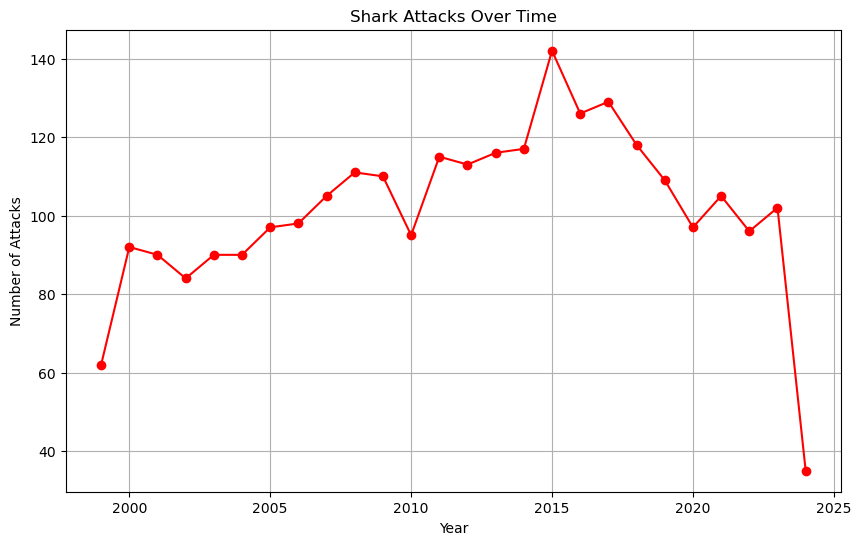

In [39]:
#GRÁFICOS!



df_sharks['date'] = pd.to_datetime(df_sharks['date'], errors='coerce')
df_sharks['year'] = df_sharks['date'].dt.year


attacks_per_year = df_sharks.groupby('year').size()

plt.figure(figsize=(10,6))
attacks_per_year.plot(kind='line', marker='o', color='red')
plt.title('Shark Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

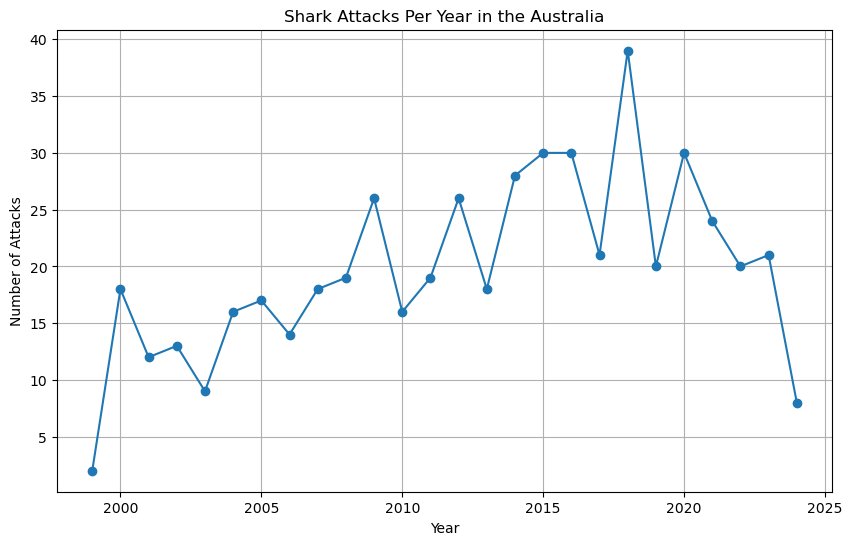

In [40]:
#PER YEAR PER COUNTRY

country_attacks = df_sharks[df_sharks['countries_clean'] == 'Australia'].copy()

country_attacks['date'] = pd.to_datetime(country_attacks['date'], errors='coerce')
country_attacks['year'] = country_attacks['date'].dt.year

attacks_per_year_country = country_attacks.groupby('year').size()

plt.figure(figsize=(10,6))
attacks_per_year_country.plot(kind='line', marker='o')

plt.title('Shark Attacks Per Year in the Australia')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()


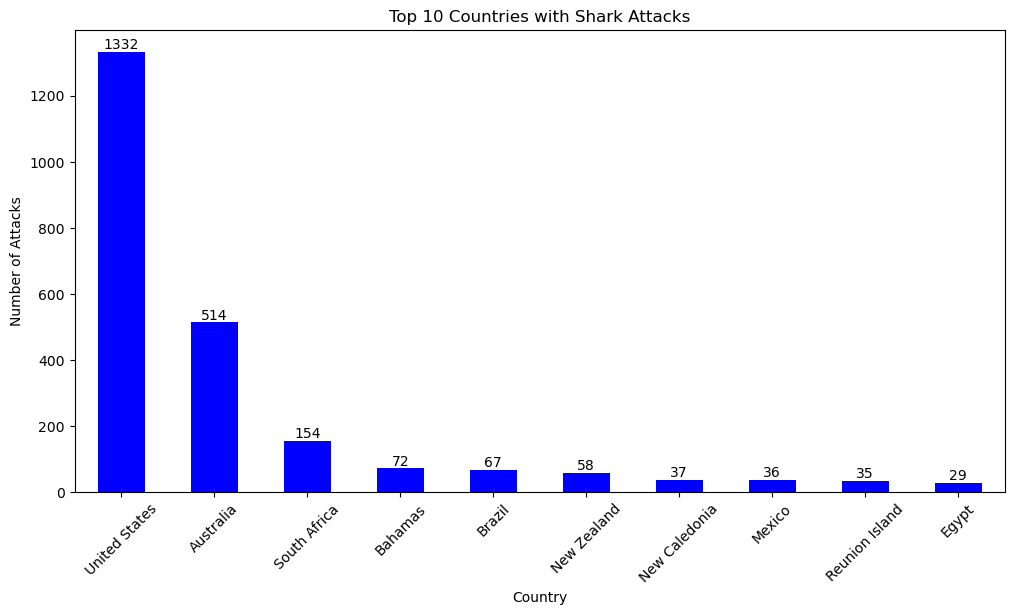

In [41]:

attacks_per_country = df_sharks['countries_clean'].value_counts().head(10)

plt.figure(figsize=(12,6))
bars = attacks_per_country.plot(kind='bar', color='blue')

# Add the number of attacks on top of each bar
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
        bar.get_height(),                   # Y-coordinate: height of the bar
        int(bar.get_height()),              # The text (number of attacks)
        ha='center',                        # Horizontal alignment (center)
        va='bottom'                         # Vertical alignment (just above the bar)
    )
attacks_per_country.plot(kind='bar', color='blue')
plt.title('Top 10 Countries with Shark Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

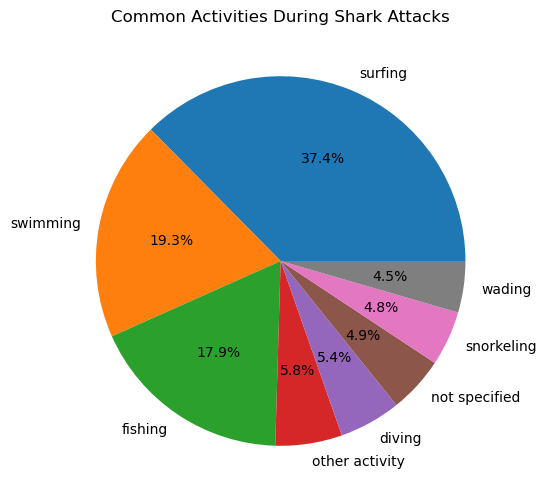

In [42]:

activity_count = df_sharks['activity'].value_counts().head(8)

plt.figure(figsize=(6,6))
activity_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Common Activities During Shark Attacks')
plt.ylabel('')
plt.show()

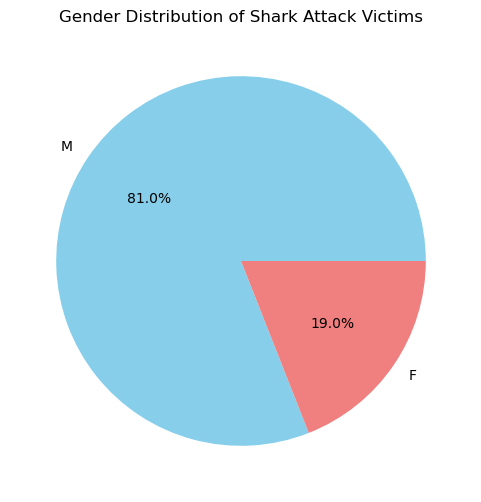

In [43]:

gender_count = df_sharks['sex']
gender_count = gender_count[gender_count.isin(['M', 'F'])].value_counts()

plt.figure(figsize=(6,6))
gender_count.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Shark Attack Victims')
plt.ylabel('')
plt.show()

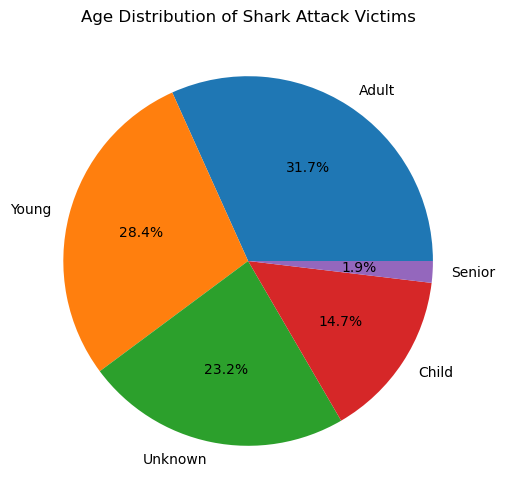

In [44]:

age_count = df_sharks['age_group'].value_counts()

plt.figure(figsize=(6,6))
age_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Age Distribution of Shark Attack Victims')
plt.ylabel('')
plt.show()

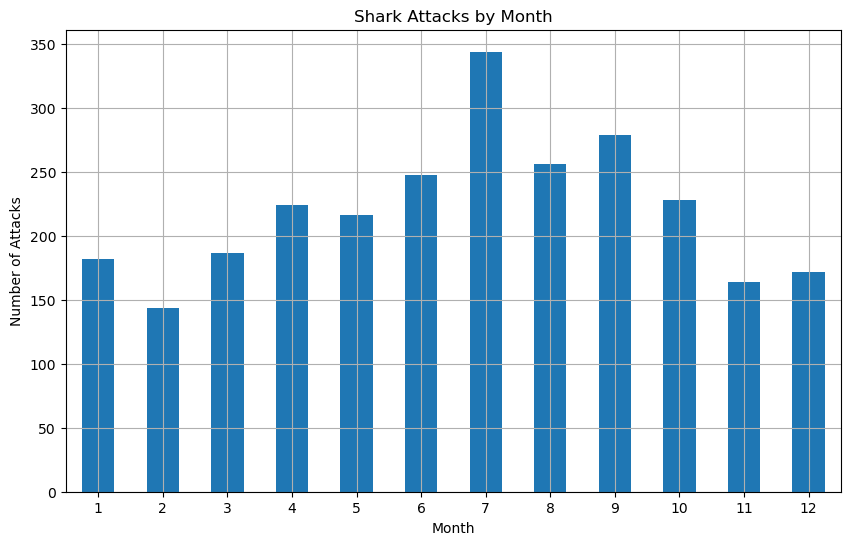

In [45]:
df_sharks['month'] = df_sharks['date'].dt.month
attacks_per_month = df_sharks.groupby('month').size()

plt.figure(figsize=(10,6))
attacks_per_month.plot(kind='bar')
plt.title('Shark Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()